In [ ]:
import os
os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

In [ ]:
def what_is_installed():
    from pycaret import show_versions
    show_versions()
try:
    what_is_installed()
except ModuleNotFoundError:
    !pip install pycaret
    what_is_installed()


System:
    python: 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
executable: /usr/bin/python3
   machine: Linux-6.1.85+-x86_64-with-glibc2.35

PyCaret required dependencies:
                 pip: 24.1.2
          setuptools: 71.0.4
             pycaret: 3.3.2
             IPython: 7.34.0
          ipywidgets: 7.7.1
                tqdm: 4.66.5
               numpy: 1.26.4
              pandas: 2.1.4
              jinja2: 3.1.4
               scipy: 1.11.4
              joblib: 1.3.2
             sklearn: 1.4.2
                pyod: 2.0.2
            imblearn: 0.12.3
   category_encoders: 2.6.3
            lightgbm: 4.5.0
               numba: 0.60.0
            requests: 2.32.3
          matplotlib: 3.7.1
          scikitplot: 0.3.7
         yellowbrick: 1.5
              plotly: 5.15.0
    plotly-resampler: Not installed
             kaleido: 0.2.1
           schemdraw: 0.15
         statsmodels: 0.14.3
              sktime: 0.26.0
               tbats: 1.1.3
            pmdari

In [ ]:
import numpy as np
import pandas as pd
from pycaret.datasets import get_data
from pycaret.time_series import TSForecastingExperiment

In [ ]:
g={
    "renderer": "png",
    "width": 1000,
    "height": 600,
}

In [ ]:
d = get_data("airquality")
d["index"] = pd.to_datetime(d["Date"] + " " + d["Time"])
d.drop(columns=["Date", "Time"], inplace=True)
target = "CO(GT)"

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2004-03-10,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2004-03-10,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2004-03-10,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [ ]:
d[d[target] == -200].head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,index
10,-200.0,1011,14,1.3,527,21,1818,34,1197,445,10.1,60.5,0.7465,2004-03-11 04:00:00
34,-200.0,831,10,1.1,506,21,1893,32,1134,384,6.1,65.9,0.6248,2004-03-12 04:00:00
39,-200.0,1545,-200,22.1,1353,-200,767,-200,2058,1588,9.2,56.2,0.6561,2004-03-12 09:00:00
58,-200.0,1147,56,6.2,821,109,1132,83,1412,992,7.0,71.1,0.7158,2004-03-13 04:00:00
82,-200.0,1130,56,5.2,773,70,1130,82,1452,1051,12.1,61.1,0.8603,2004-03-14 04:00:00


In [ ]:
d.replace(-200, np.nan, inplace=True)
d[d[target] == -200]

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,index


In [ ]:
eda = TSForecastingExperiment()

In [ ]:
eda.setup(
    data=d,
    target=target,
    index="index",
    fh=48,
    numeric_imputation_target="ffill",
    numeric_imputation_exogenous="ffill",
    fig_kwargs=g,
    session_id=42,
)

,Description,Value
0,session_id,42
1,Target,CO(GT)
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(9357, 13)"
5,Transformed data shape,"(9357, 13)"
6,Transformed train set shape,"(9309, 13)"
7,Transformed test set shape,"(48, 13)"
8,Rows with missing values,91.2%
9,Fold Generator,ExpandingWindowSplitter


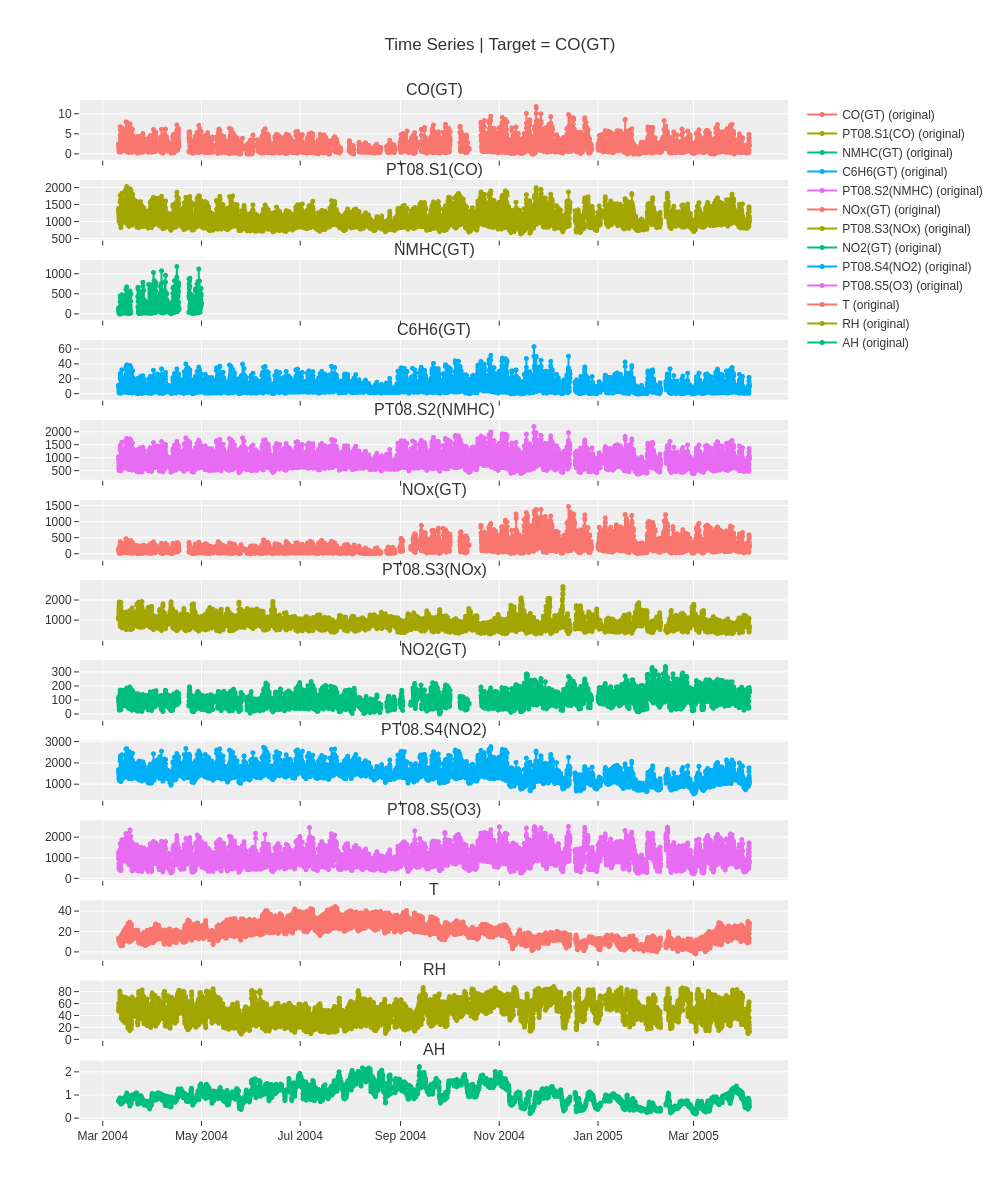

In [ ]:
eda.plot_model(fig_kwargs={"renderer": "png", "width": 1000, "height": 1200})

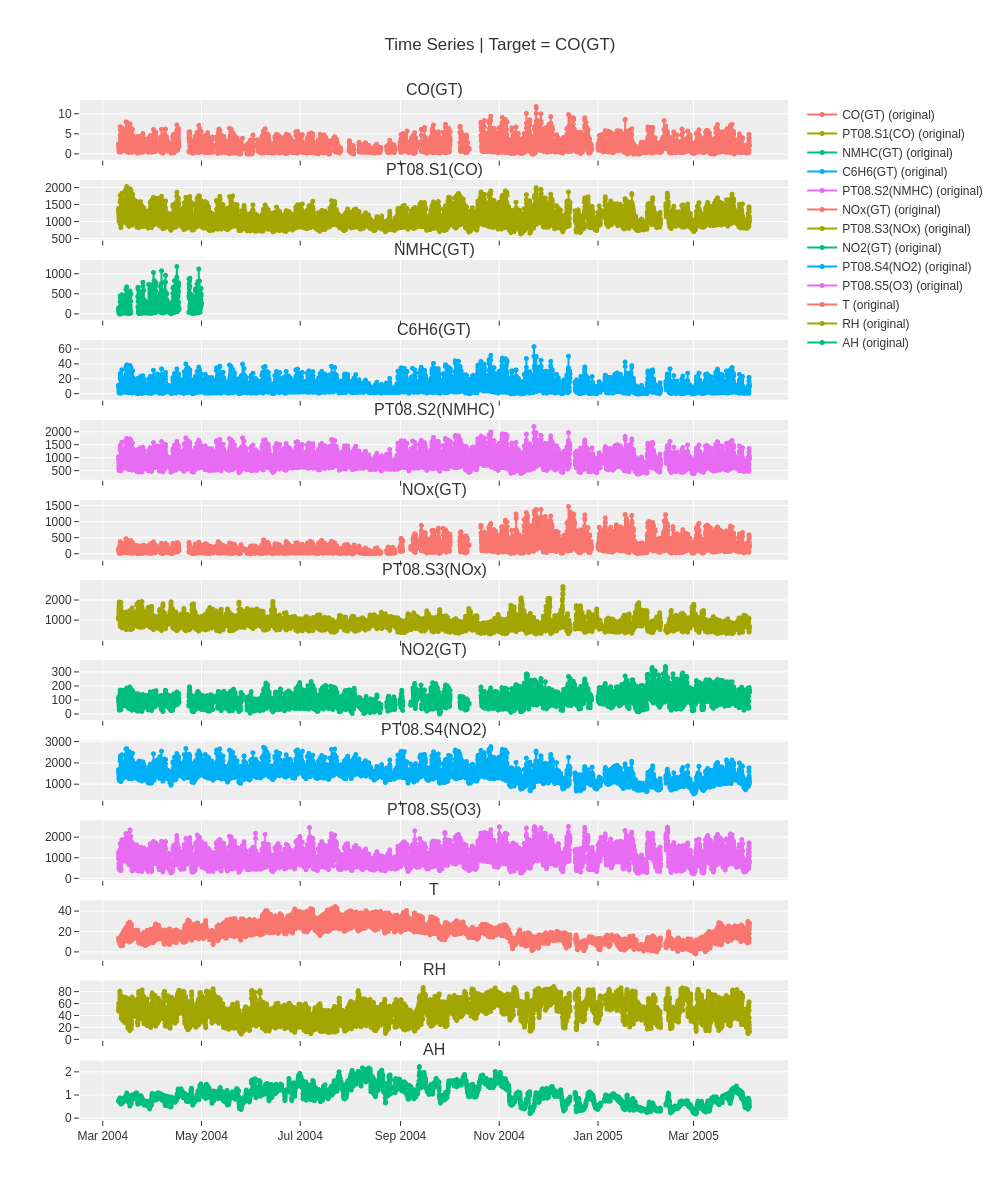

In [ ]:
eda.plot_model(
    plot="ts",
    fig_kwargs={
        'height': 1200,
        "resampler_kwargs": {
            "default_n_shown_samples": 1500,
            "show_dash": {"mode": "inline", "port": 8055},
        },
    },
)

In [ ]:
exclude = ["NMHC(GT)"]

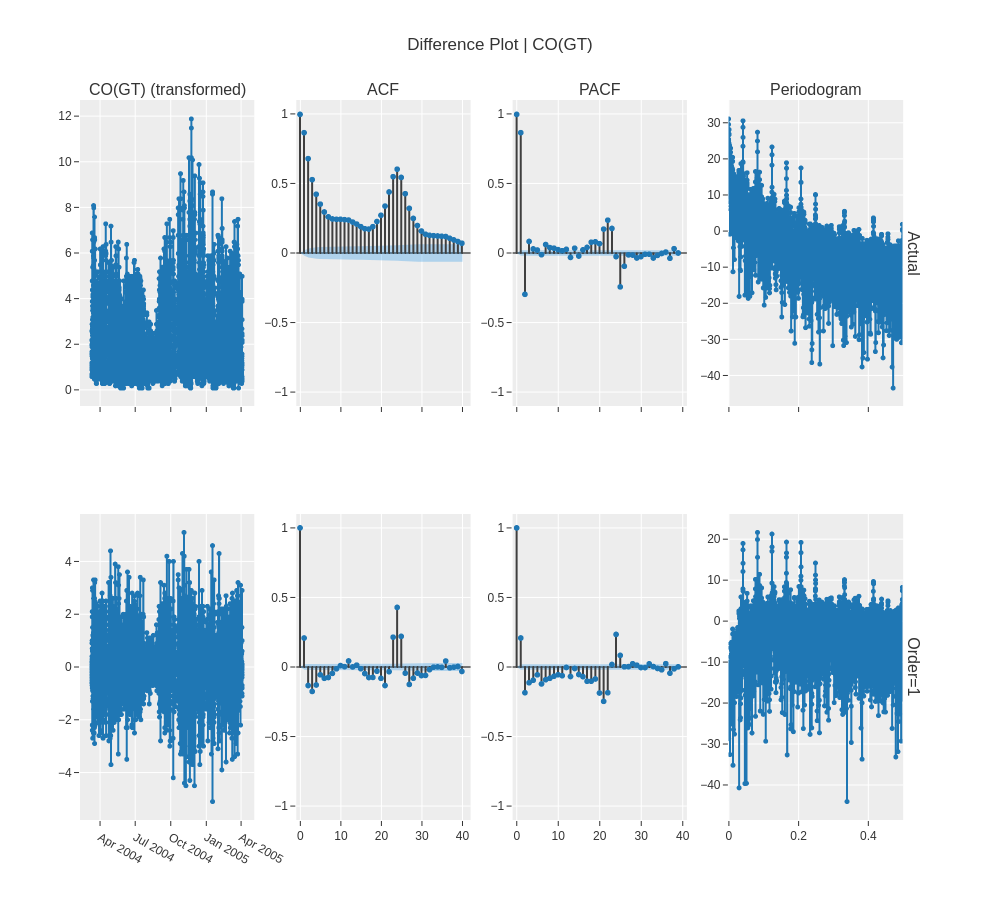

In [ ]:
eda.plot_model(
    plot="diff",
    fig_kwargs={
        "height": 900,
        "resampler_kwargs": {"default_n_shown_samples": 1500 }
    },
    data_kwargs={"acf": True, "pacf": True, "periodogram": True},
)

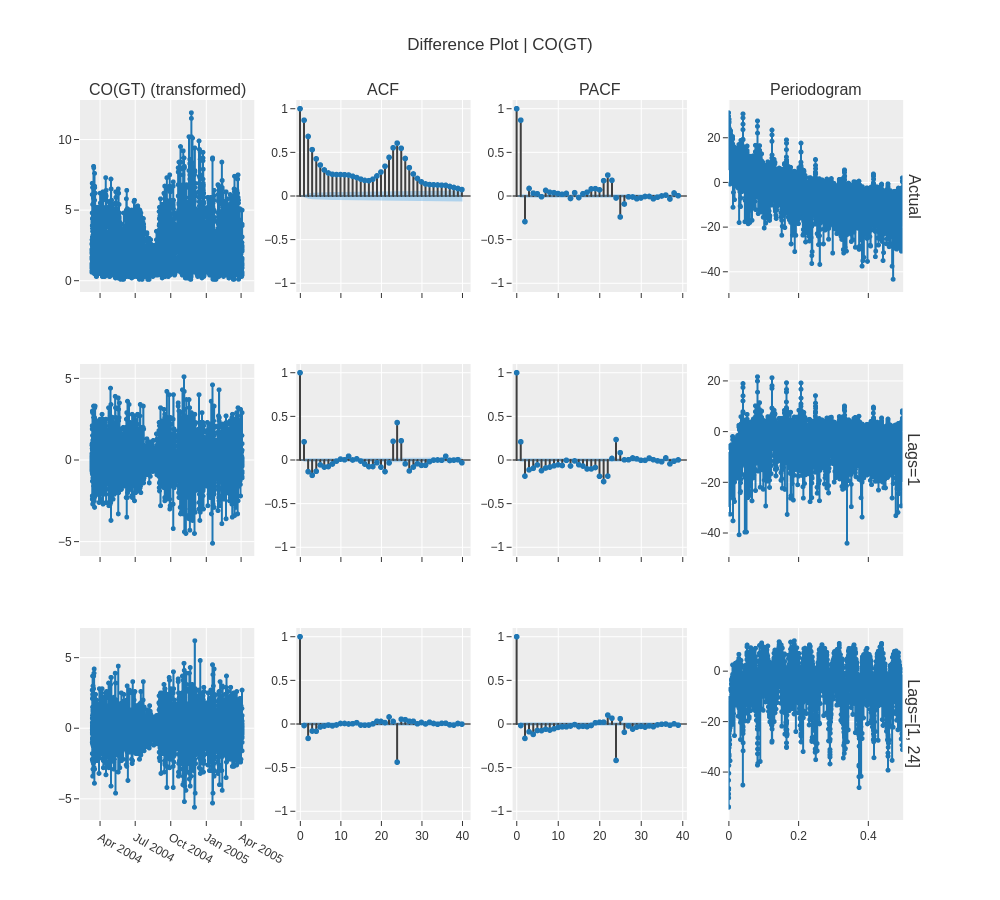

In [ ]:
eda.plot_model(
    plot="diff",
    fig_kwargs={
        "height": 900,
        "resampler_kwargs": {
            "default_n_shown_samples": 1500,
            "show_dash": {"mode": "inline", "port": 8056},
        },
    },
    data_kwargs={
        "lags_list": [1, [1, 24]],
        "acf": True,
        "pacf": True,
        "periodogram": True,
    },
)


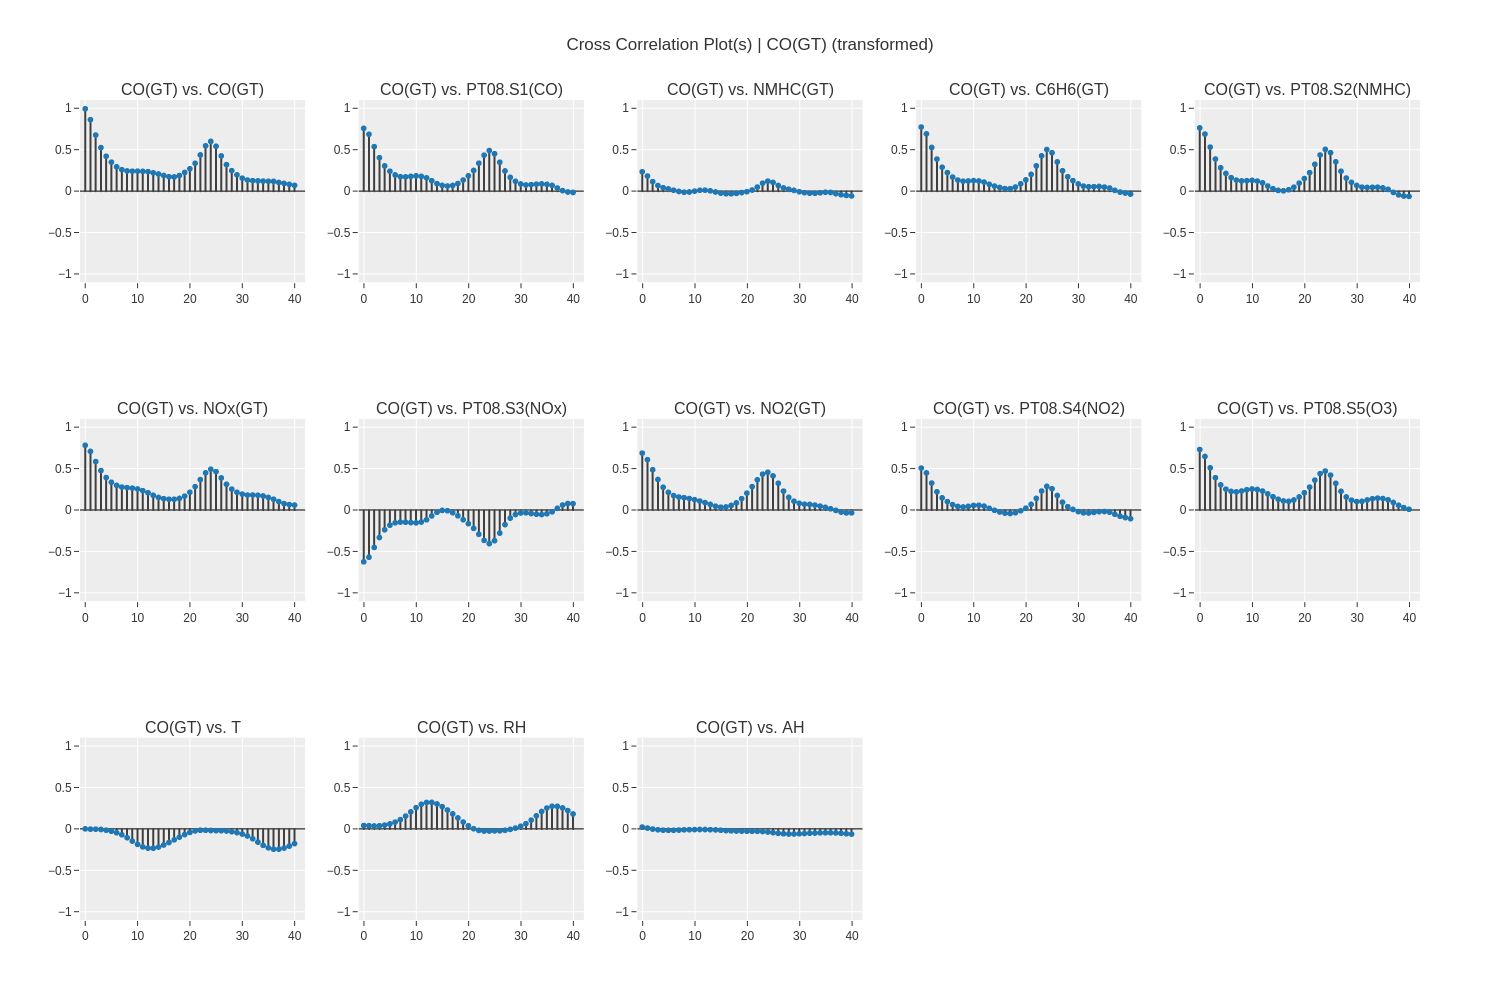

In [ ]:
eda.plot_model(plot="ccf", fig_kwargs={"height": 1000, "width": 1500})

In [ ]:
exclude.append("AH")
exclude

['NMHC(GT)', 'AH']

In [ ]:
d = get_data("airquality")
d = d.iloc[-720:]
d["index"] = pd.to_datetime(d["Date"] + " " + d["Time"])
d.drop(columns=["Date", "Time"], inplace=True)
d.replace(-200, np.nan, inplace=True)
target = "CO(GT)"
exclude = ['NMHC(GT)', 'AH']
d.drop(columns=exclude, inplace=True)
d.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2004-03-10,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2004-03-10,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2004-03-10,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,index
8637,1.5,983.0,5.9,806.0,180.0,820.0,132.0,966.0,615.0,13.5,28.3,2005-03-05 15:00:00
8638,1.8,1018.0,7.3,868.0,255.0,751.0,162.0,1015.0,804.0,13.0,29.7,2005-03-05 16:00:00
8639,2.0,1101.0,8.4,916.0,251.0,721.0,159.0,1125.0,861.0,11.6,38.7,2005-03-05 17:00:00
8640,1.9,1116.0,7.7,888.0,258.0,695.0,156.0,1176.0,980.0,8.6,56.3,2005-03-05 18:00:00
8641,2.5,1161.0,9.1,945.0,344.0,654.0,177.0,1205.0,1077.0,8.5,57.9,2005-03-05 19:00:00


In [ ]:
data_uni = d.copy()
data_uni.set_index("index", inplace=True)
data_uni = data_uni[target]

exp_uni = TSForecastingExperiment()
exp_uni.setup(
    data=data_uni, fh=48,
    numeric_imputation_target="ffill", numeric_imputation_exogenous="ffill",
    fig_kwargs=g, session_id=42
)

,Description,Value
0,session_id,42
1,Target,CO(GT)
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(720, 1)"
5,Transformed data shape,"(720, 1)"
6,Transformed train set shape,"(672, 1)"
7,Transformed test set shape,"(48, 1)"
8,Rows with missing values,2.8%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
model = exp_uni.create_model("arima", order=(0,1,0), seasonal_order=(0,1,0,24))

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2005-03-27 14:00,1.5606,1.4904,1.1466,1.6039,0.6598,1.0119,-1.7616
1,2005-03-29 14:00,2.5919,1.9767,1.8655,2.1105,1.4991,0.7419,-2.7317
2,2005-03-31 14:00,1.4605,1.1539,1.0401,1.2124,1.2860,1.2780,-6.2314
Mean,NaT,1.8710,1.5403,1.3507,1.6422,1.1483,1.0106,-3.5749
SD,NaT,0.5114,0.3378,0.3666,0.3676,0.3562,0.2189,1.9197


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

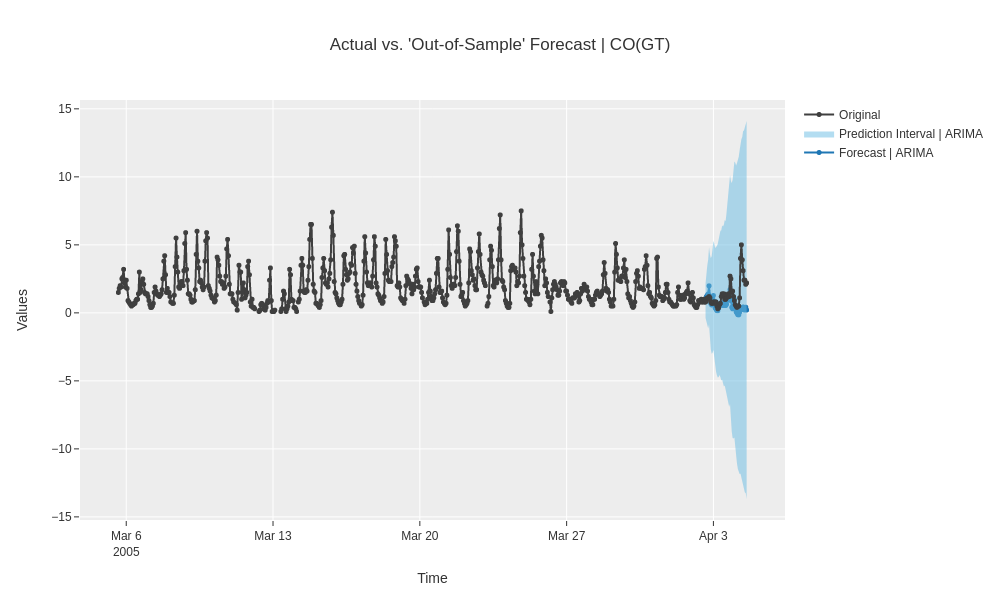

In [ ]:
exp_uni.plot_model(model)

In [ ]:
exp_exo = TSForecastingExperiment()
exp_exo.setup(
    data=d, target=target, index="index", fh=48,
    numeric_imputation_target="ffill", numeric_imputation_exogenous="ffill",
    fig_kwargs=g, session_id=42
)

,Description,Value
0,session_id,42
1,Target,CO(GT)
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(720, 11)"
5,Transformed data shape,"(720, 11)"
6,Transformed train set shape,"(672, 11)"
7,Transformed test set shape,"(48, 11)"
8,Rows with missing values,3.8%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
model_exo = exp_exo.create_model("arima", order=(0,1,0), seasonal_order=(0,1,0,24))

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2005-03-27 14:00,0.2512,0.2282,0.1846,0.2455,0.1089,0.1192,0.9353
1,2005-03-29 14:00,0.2321,0.2227,0.1670,0.2378,0.1100,0.1219,0.9526
2,2005-03-31 14:00,0.2525,0.2733,0.1798,0.2872,0.1723,0.1572,0.5943
Mean,NaT,0.2453,0.2414,0.1771,0.2568,0.1304,0.1328,0.8274
SD,NaT,0.0093,0.0227,0.0074,0.0217,0.0296,0.0173,0.1650


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

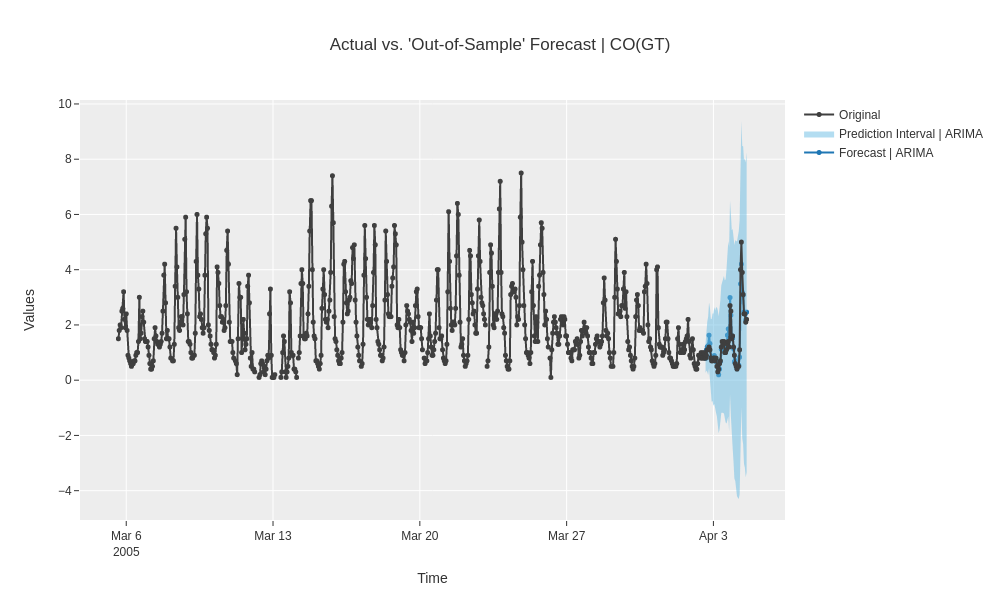

In [ ]:
exp_exo.plot_model(model_exo)

In [ ]:
final_model_exo = exp_exo.finalize_model(model_exo)

In [ ]:
def safe_predict(exp, model):
    """Prediction wrapper for demo purposes."""
    try:
        exp.predict_model(model)
    except ValueError as exception:
        print(exception)
        exo_vars = exp.exogenous_variables
        print(f"{len(exo_vars)} exogenous variables (X) needed in order to make future predictions:\n{exo_vars}")

safe_predict(exp_exo, final_model_exo)

Model was trained with exogenous variables but you have not passed any for predictions. Please pass exogenous variables to make predictions.
10 exogenous variables (X) needed in order to make future predictions:
['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH']


In [ ]:
exp_slim = TSForecastingExperiment()
keep = [target, "index", 'NOx(GT)', "PT08.S3(NOx)", "RH"]
data_slim = d[keep]
exp_slim.setup(
    data=data_slim, target=target, index="index", fh=48,
    numeric_imputation_target="ffill", numeric_imputation_exogenous="ffill",
    fig_kwargs=g, session_id=42
)

,Description,Value
0,session_id,42
1,Target,CO(GT)
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(720, 4)"
5,Transformed data shape,"(720, 4)"
6,Transformed train set shape,"(672, 4)"
7,Transformed test set shape,"(48, 4)"
8,Rows with missing values,3.8%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
model_slim = exp_slim.create_model("arima", order=(0,1,0), seasonal_order=(0,1,0,24))

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2005-03-27 14:00,0.5014,0.4028,0.3684,0.4334,0.2663,0.2255,0.7983
1,2005-03-29 14:00,0.2657,0.2369,0.1912,0.2529,0.1004,0.0993,0.9464
2,2005-03-31 14:00,0.3023,0.2847,0.2153,0.2992,0.2132,0.1967,0.5596
Mean,NaT,0.3565,0.3081,0.2583,0.3285,0.1933,0.1738,0.7681
SD,NaT,0.1035,0.0697,0.0784,0.0766,0.0692,0.0540,0.1593


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

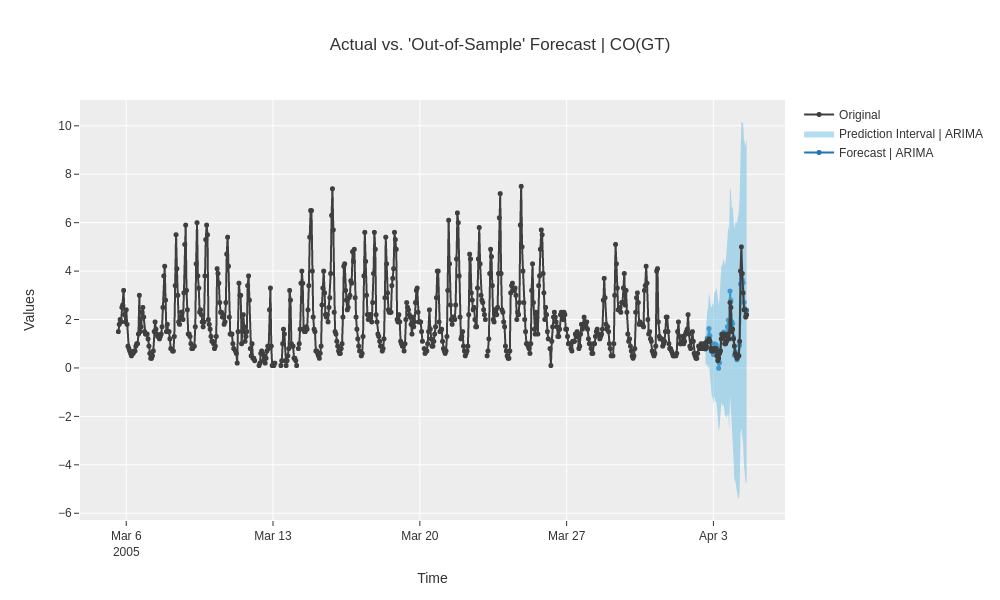

In [ ]:
exp_slim.plot_model(model_slim)

In [ ]:
final_slim_model = exp_slim.finalize_model(model_slim)

In [ ]:
_ = exp_slim.save_model(final_slim_model, "final_slim_model")

Transformation Pipeline and Model Successfully Saved


In [ ]:
safe_predict(exp_slim, final_slim_model)

Model was trained with exogenous variables but you have not passed any for predictions. Please pass exogenous variables to make predictions.
3 exogenous variables (X) needed in order to make future predictions:
['NOx(GT)', 'PT08.S3(NOx)', 'RH']


In [ ]:
exog_vars = ['NOx(GT)', 'PT08.S3(NOx)', 'RH']
d = d[["index"] + exog_vars]
d.head()

,index,NOx(GT),PT08.S3(NOx),RH
8637,2005-03-05 15:00:00,180.0,820.0,28.3
8638,2005-03-05 16:00:00,255.0,751.0,29.7
8639,2005-03-05 17:00:00,251.0,721.0,38.7
8640,2005-03-05 18:00:00,258.0,695.0,56.3
8641,2005-03-05 19:00:00,344.0,654.0,57.9


In [ ]:
exog_exps = []
exog_models = []
for exog_var in exog_vars:
    exog_exp = TSForecastingExperiment()
    exog_exp.setup(
        data=d[["index", exog_var]], target=exog_var, index="index", fh=48,
        numeric_imputation_target="ffill", numeric_imputation_exogenous="ffill",
        fig_kwargs=g, session_id=42
    )
    best = exog_exp.compare_models(
        sort="mase", include=["arima", "ets", "exp_smooth", "theta", "lightgbm_cds_dt",]
    )
    final_exog_model = exog_exp.finalize_model(best)

    exog_exps.append(exog_exp)
    exog_models.append(final_exog_model)
future_exog = [
    exog_exp.predict_model(exog_model)
    for exog_exp, exog_model in zip(exog_exps, exog_models)
]
future_exog = pd.concat(future_exog, axis=1)
future_exog.columns = exog_vars

,Description,Value
0,session_id,42
1,Target,NOx(GT)
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(720, 1)"
5,Transformed data shape,"(720, 1)"
6,Transformed train set shape,"(672, 1)"
7,Transformed test set shape,"(48, 1)"
8,Rows with missing values,0.8%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
arima,ARIMA,0.8406,0.9158,87.3689,133.0642,0.4273,0.3443,-1.3072,0.4900
exp_smooth,Exponential Smoothing,0.8954,0.8400,93.0132,121.9760,0.4828,0.5917,-0.9311,0.2367
theta,Theta Forecaster,1.0279,0.9437,107.4620,137.6886,0.5192,0.4990,-0.4072,0.1167
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.2021,1.1033,124.6215,160.1069,0.6995,0.5078,-2.5717,4.9500
ets,ETS,1.6659,1.5724,173.0732,228.4765,0.9384,0.5574,-4.4268,1.4300


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

,Description,Value
0,session_id,42
1,Target,PT08.S3(NOx)
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(720, 1)"
5,Transformed data shape,"(720, 1)"
6,Transformed train set shape,"(672, 1)"
7,Transformed test set shape,"(48, 1)"
8,Rows with missing values,0.1%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
exp_smooth,Exponential Smoothing,1.2435,1.2056,126.5383,158.9241,0.1738,0.1695,-0.0211,0.4467
ets,ETS,1.3630,1.3141,138.7266,173.2553,0.1906,0.1879,-0.2091,1.5100
theta,Theta Forecaster,1.3716,1.3079,139.5929,172.4272,0.1909,0.1878,-0.1963,0.2200
arima,ARIMA,1.3929,1.3245,141.6775,174.6211,0.1792,0.1953,-0.3985,1.3800
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.6778,1.5491,170.7442,204.2588,0.2197,0.2541,-0.7666,3.6833


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

,Description,Value
0,session_id,42
1,Target,RH
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(720, 1)"
5,Transformed data shape,"(720, 1)"
6,Transformed train set shape,"(672, 1)"
7,Transformed test set shape,"(48, 1)"
8,Rows with missing values,0.1%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
theta,Theta Forecaster,1.6218,1.4765,11.3749,13.1578,0.2481,0.2286,-0.0585,0.1067
arima,ARIMA,1.8001,1.6165,12.6310,14.4108,0.2548,0.2523,-0.2695,0.5600
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,2.7797,2.6115,19.4667,23.2519,0.5241,0.3609,-4.8711,1.9700
exp_smooth,Exponential Smoothing,5.2972,4.7592,37.2423,42.4918,0.7188,0.9298,-10.5261,0.2067
ets,ETS,5.3235,4.7812,37.4259,42.6872,0.7228,0.9349,-10.5911,0.3533


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
future_exog

,NOx(GT),PT08.S3(NOx),RH
2005-04-04 15:00,247.2036,651.1830,13.0838
2005-04-04 16:00,274.0699,644.2770,13.1056
2005-04-04 17:00,298.6685,613.3309,13.0876
2005-04-04 18:00,231.8742,558.1970,13.1094
2005-04-04 19:00,398.1459,499.6994,13.0913
2005-04-04 20:00,378.3662,524.6385,13.1131
2005-04-04 21:00,252.7246,596.2236,13.0950
2005-04-04 22:00,246.6336,684.6523,13.1169
2005-04-04 23:00,180.6670,721.4174,13.0988
2005-04-05 00:00,125.5157,756.1241,13.1206


In [ ]:
exp_future = TSForecastingExperiment()

In [ ]:
final_slim_model = exp_future.load_model("final_slim_model")

Transformation Pipeline and Model Successfully Loaded


<Axes: >

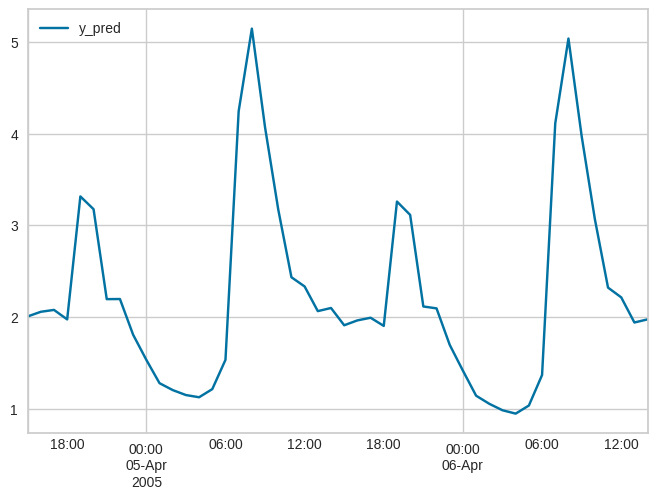

In [ ]:
future_preds = exp_future.predict_model(final_slim_model, X=future_exog)
future_preds.plot()

In [ ]:
d = get_data("airquality", verbose=False)

# Limiting the data for demonstration purposes.
d = d.iloc[-720:]
d["index"] = pd.to_datetime(d["Date"] + " " + d["Time"])
d.drop(columns=["Date", "Time"], inplace=True)
d.replace(-200, np.nan, inplace=True)
d.set_index("index", inplace=True)

target = "CO(GT)"
exog_vars = ['NOx(GT)', 'PT08.S3(NOx)', 'RH']
include = [target] + exog_vars
d = d[include]
d.head()

,CO(GT),NOx(GT),PT08.S3(NOx),RH
index,,,,
2005-03-05 15:00:00,1.5,180.0,820.0,28.3
2005-03-05 16:00:00,1.8,255.0,751.0,29.7
2005-03-05 17:00:00,2.0,251.0,721.0,38.7
2005-03-05 18:00:00,1.9,258.0,695.0,56.3
2005-03-05 19:00:00,2.5,344.0,654.0,57.9


In [ ]:
FH=48
metric = "mase"
exclude = ["auto_arima", "bats", "tbats", "lar_cds_dt", "par_cds_dt"]

In [ ]:
exp_auto = TSForecastingExperiment()
exp_auto.setup(
    data=d, target=target, fh=FH, enforce_exogenous=False,
    numeric_imputation_target="ffill", numeric_imputation_exogenous="ffill",
    fig_kwargs=g, session_id=42
)

,Description,Value
0,session_id,42
1,Target,CO(GT)
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(720, 4)"
5,Transformed data shape,"(720, 4)"
6,Transformed train set shape,"(672, 4)"
7,Transformed test set shape,"(48, 4)"
8,Rows with missing values,3.8%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
best = exp_auto.compare_models(sort=metric, turbo=False, exclude=exclude)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
arima,ARIMA,0.2509,0.2302,0.1810,0.2449,0.1443,0.1523,0.8499,1.7800
prophet,Prophet,0.3081,0.2651,0.2228,0.2827,0.1939,0.2022,0.8498,0.5633
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.8609,0.8199,0.6211,0.8730,0.4675,0.4450,-0.7053,3.6967
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.8647,0.8218,0.6238,0.8750,0.4714,0.4491,-0.7106,2.5067
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.8651,0.8220,0.6240,0.8752,0.4718,0.4494,-0.7111,2.4967
snaive,Seasonal Naive Forecaster,0.9672,0.9659,0.6972,1.0275,0.4645,0.3643,-1.8616,0.3000
theta,Theta Forecaster,0.9871,0.8962,0.7146,0.9574,0.4639,0.4412,-0.2349,0.2000
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.9948,0.9519,0.7181,1.0130,0.5099,0.3702,-1.7375,3.8033
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,1.0081,0.9598,0.7275,1.0213,0.5178,0.3741,-1.8354,2.6067
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,1.0081,0.9598,0.7275,1.0213,0.5178,0.3741,-1.8353,3.9267


Processing:   0%|          | 0/109 [00:00<?, ?it/s]

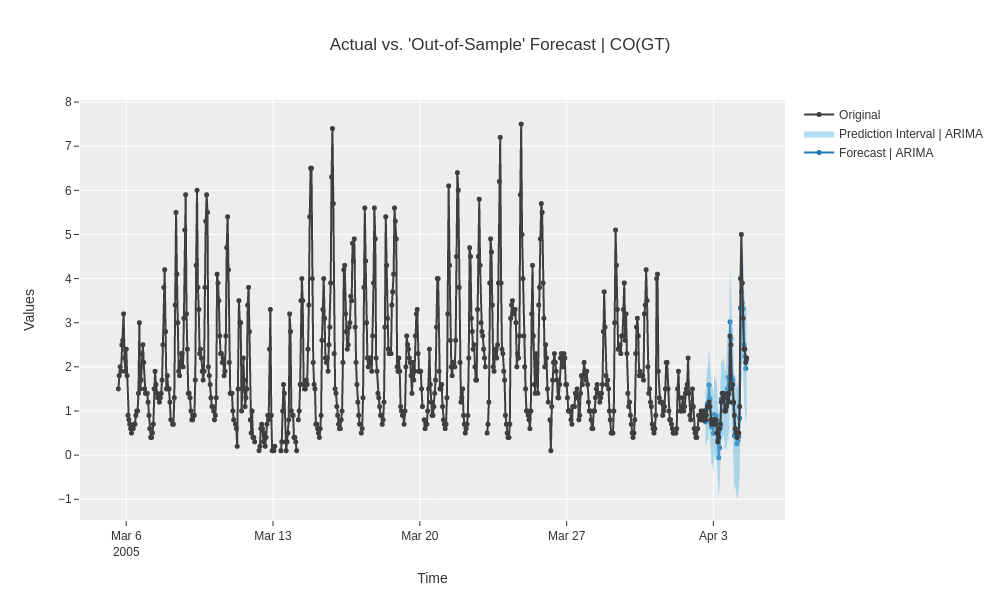

In [ ]:
exp_auto.plot_model(best)

In [ ]:
final_auto_model = exp_auto.finalize_model(best)

In [ ]:
def safe_predict(exp, model):
    """Prediction wrapper for demo purposes."""
    try:
        future_preds = exp.predict_model(model)
    except ValueError as exception:
        print(exception)
        exo_vars = exp.exogenous_variables
        print(f"{len(exo_vars)} exogenous variables (X) needed in order to make future predictions:\n{exo_vars}")


        exog_exps = []
        exog_models = []
        for exog_var in exog_vars:
            exog_exp = TSForecastingExperiment()
            exog_exp.setup(
                data=d[exog_var], fh=FH,
                numeric_imputation_target="ffill", numeric_imputation_exogenous="ffill",
                fig_kwargs=g, session_id=42
            )

            # Users can customize how to model future exogenous variables i.e. add
            # more steps and models to potentially get better models at the expense
            # of higher modeling time.
            best = exog_exp.compare_models(
                sort=metric, include=["arima", "ets", "exp_smooth", "theta", "lightgbm_cds_dt",]
            )
            final_exog_model = exog_exp.finalize_model(best)

            exog_exps.append(exog_exp)
            exog_models.append(final_exog_model)

        # Step 2: Get future predictions for exog variables ----
        future_exog = [
            exog_exp.predict_model(exog_model)
            for exog_exp, exog_model in zip(exog_exps, exog_models)
        ]
        future_exog = pd.concat(future_exog, axis=1)
        future_exog.columns = exog_vars

        future_preds = exp.predict_model(model, X=future_exog)

    return future_preds

Model was trained with exogenous variables but you have not passed any for predictions. Please pass exogenous variables to make predictions.
3 exogenous variables (X) needed in order to make future predictions:
['NOx(GT)', 'PT08.S3(NOx)', 'RH']


,Description,Value
0,session_id,42
1,Target,NOx(GT)
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(720, 1)"
5,Transformed data shape,"(720, 1)"
6,Transformed train set shape,"(672, 1)"
7,Transformed test set shape,"(48, 1)"
8,Rows with missing values,0.8%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
arima,ARIMA,0.8406,0.9158,87.3689,133.0642,0.4273,0.3443,-1.3072,2.5067
exp_smooth,Exponential Smoothing,0.8954,0.8400,93.0132,121.9760,0.4828,0.5917,-0.9311,0.3933
theta,Theta Forecaster,1.0279,0.9437,107.4620,137.6886,0.5192,0.4990,-0.4072,0.1800
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.2021,1.1033,124.6215,160.1069,0.6995,0.5078,-2.5717,4.1867
ets,ETS,1.6659,1.5724,173.0732,228.4765,0.9384,0.5574,-4.4268,1.9833


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

,Description,Value
0,session_id,42
1,Target,PT08.S3(NOx)
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(720, 1)"
5,Transformed data shape,"(720, 1)"
6,Transformed train set shape,"(672, 1)"
7,Transformed test set shape,"(48, 1)"
8,Rows with missing values,0.1%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
exp_smooth,Exponential Smoothing,1.2435,1.2056,126.5383,158.9241,0.1738,0.1695,-0.0211,0.2367
ets,ETS,1.3630,1.3141,138.7266,173.2553,0.1906,0.1879,-0.2091,0.8033
theta,Theta Forecaster,1.3716,1.3079,139.5929,172.4272,0.1909,0.1878,-0.1963,0.1133
arima,ARIMA,1.3929,1.3245,141.6775,174.6211,0.1792,0.1953,-0.3985,0.8233
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.6778,1.5491,170.7442,204.2588,0.2197,0.2541,-0.7666,5.2033


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

,Description,Value
0,session_id,42
1,Target,RH
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(720, 1)"
5,Transformed data shape,"(720, 1)"
6,Transformed train set shape,"(672, 1)"
7,Transformed test set shape,"(48, 1)"
8,Rows with missing values,0.1%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
theta,Theta Forecaster,1.6218,1.4765,11.3749,13.1578,0.2481,0.2286,-0.0585,0.1667
arima,ARIMA,1.8001,1.6165,12.6310,14.4108,0.2548,0.2523,-0.2695,0.2100
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,2.7797,2.6115,19.4667,23.2519,0.5241,0.3609,-4.8711,2.7333
exp_smooth,Exponential Smoothing,5.2972,4.7592,37.2423,42.4918,0.7188,0.9298,-10.5261,0.2600
ets,ETS,5.3235,4.7812,37.4259,42.6872,0.7228,0.9349,-10.5911,0.2100


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

<Axes: >

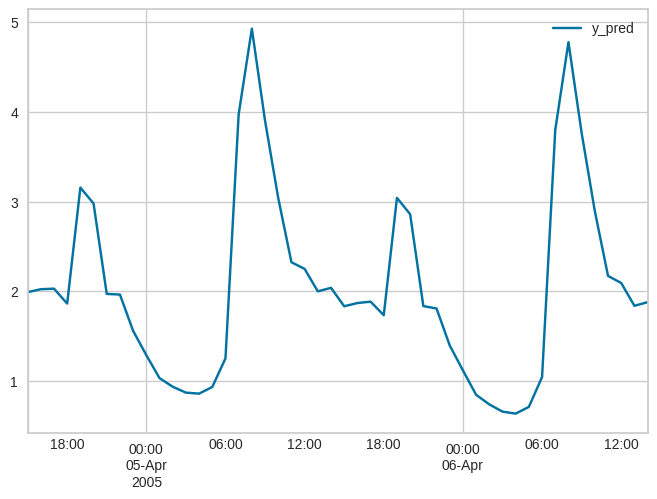

In [ ]:
future_preds = safe_predict(exp_auto, final_auto_model)
future_preds.plot()